Using TensorFlow backend.


(-0.05, 1.05, -0.05, 1.05)

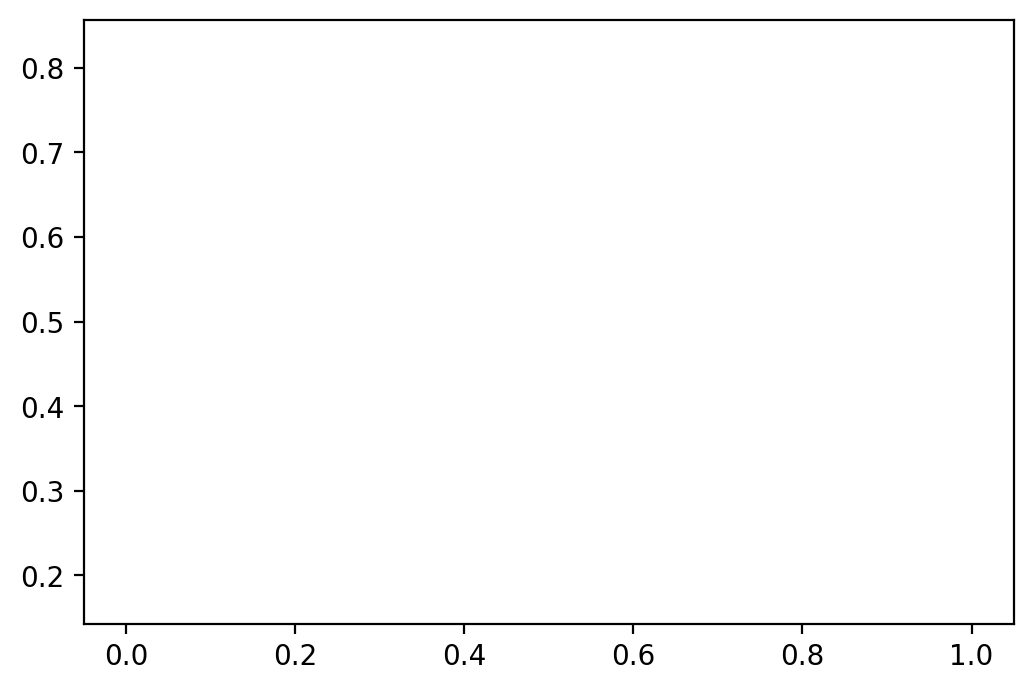

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.utils import np_utils
from keras import backend as K

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


plt.rcParams['figure.dpi'] = 100
plt.ion()
plt.axis('equal')


In [2]:
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
#x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, train_size=50000, test_size=10000)
print(x_train.shape)
#print(x_validation.shape)


(60000, 28, 28)
(60000, 28, 28)


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
## Reshape for Dense network
#x_train = x_train.reshape(x_train.shape[0], 784)
#x_test = x_test.reshape(x_test.shape[0], 784)
#x_validation = x_validation.reshape(x_validation, 784)

In [5]:
## Reshape for Convolutional NN
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   # x_validation = x_validation.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   # x_validation = x_validation.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_validation = x_validation.astype('float32')

x_train /= 255
x_test /= 255
#x_validation /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
#print(x_validation.shape, 'validation samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#y_validation = keras.utils.to_categorical(y_validation, num_classes)



(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples


In [8]:
def create_dense_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(784,),
                   # kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None), 
                    kernel_regularizer=keras.regularizers.l1(l=0.00001))
             )
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(10,
                    #kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None), 
                    kernel_regularizer=keras.regularizers.l1(l=0.00001))
             )
    model.add(Activation('softmax'))

    optimizer = Adam()
    %time model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])
    
    return model

def create_conv_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     #kernel_regularizer=keras.regularizers.l1(l=0.00001),
                     input_shape=input_shape
                    ))
    model.add(MaxPooling2D( pool_size=(2, 2) ))
    model.add(Conv2D(64, kernel_size=(3, 3),
                     activation='relu',
                     #kernel_regularizer=keras.regularizers.l1(l=0.00001)
                    ))
    model.add(MaxPooling2D( pool_size=(2, 2) ))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(128,
                    activation='relu',
                   # kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None), 
                   # kernel_regularizer=keras.regularizers.l1(l=0.00001)
                   )
             )
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,
                    activation='relu',
                    #kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None), 
                   # kernel_regularizer=keras.regularizers.l1(l=0.00001)
                   )
             )
    
    optimizer = Adadelta()
    %time model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
    
    return model



In [9]:
#keras.layers.MaxPooling2D?

In [10]:
#model = create_dense_model()

In [11]:
model = create_conv_model()

W0717 13:06:07.951981 140463149672256 deprecation_wrapper.py:119] From /home/loganathan001/tf_jupyter_gym/tf_jupyter_gym/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 13:06:07.972643 140463149672256 deprecation_wrapper.py:119] From /home/loganathan001/tf_jupyter_gym/tf_jupyter_gym/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 13:06:07.975991 140463149672256 deprecation_wrapper.py:119] From /home/loganathan001/tf_jupyter_gym/tf_jupyter_gym/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 13:06:07.991933 140463149672256 deprecation_wrapper.py:119] From /home/loganathan001/tf_jupyter_gym/tf_jupyter_gym/lib/python3.6/site-packages/keras/backend/tens

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
__________

In [ ]:
h = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

W0717 13:06:08.210821 140463149672256 deprecation.py:323] From /home/loganathan001/tf_jupyter_gym/tf_jupyter_gym/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
56192/60000 [===========================>..] - ETA: 2s - loss: nan - acc: 0.1512

In [ ]:
model.save_weights("kera-mnist.model")

In [ ]:
model.save_weights("kera-mnist-conv.model")

In [ ]:
del(model)

In [ ]:
model = create_dense_model()
model.load_weights("kera-mnist.model")

In [ ]:
model = create_conv_model()
model.load_weights("kera-mnist-conv.model")

In [ ]:
h.history

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [ ]:
from tensorboard import notebook
import os

logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%load_ext tensorboard


In [ ]:
%tensorboard --logdir {logs_base_dir} --host "0.0.0.0"

In [ ]:
notebook.list()

In [ ]:
notebook.display(port=6006, height=1000) 

In [ ]:
import cv2
import numpy as np

def pixels(img_file):
    im = cv2.imread(img_file)
    pix_val_flat = [gray(r,g,b) for sets in im for (r,g,b) in sets]
    return np.array(pix_val_flat)
    
def gray(red, green, blue):
    gray = (red * 0.299) + (green * 0.587) + (blue * 0.114)
    return gray

def get_test_digits(ten_hdigits):
    hdigits = ten_hdigits.reshape([28,28*10])
    hdigits = np.hsplit(hdigits,[28*(i+1) for i in range(10 -1)])
    return (np.array(hdigits), np.array([i for i in range(len(hdigits))]))

def get_test_data(img_file):
    img = pixels(img_file)
    x_test_data, y_test_data = get_test_digits(img)
    
    x_test_data = x_test_data.reshape(len(x_test_data), 784)
    x_test_data = x_test_data.astype('float32')

    x_test_data /= 255
    y_test_data = keras.utils.to_categorical(y_test_data, num_classes)
    return (x_test_data, y_test_data)

def eval_digit_file(digit_file):
    (x_test_data, y_test_data) = get_test_data(digit_file)
    for i in range(10):
        print("digit: ", i)
        score = model.evaluate(np.array([x_test_data[i]]), np.array([y_test_data[i]]), verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
    


In [ ]:
eval_digit_file('mydigit1.png')

In [ ]:
eval_digit_file('mydigit2.png')

In [ ]:
plt.axis('equal')
plt.pcolor(np.reshape(x_train[5], [28, 28]))